# Project Rain in Australia
# Loïc MARY

# Presentation of the project

For about 39 cities in Australia, the goal of the project is to predict if it is gonna rain the day j+1 taking into account the weather data available during the day j.
Here are the covariables available :
- Date
- Location : The common name of the location of the weather station
- MinTemp : The minimum temperature (°C)
- MaxTemp : The maximum temperature (°C)
- Rainfall : The amount of rainfall recorded for the day in mm
- Evaporation : The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine : The number of hours of bright sunshine in the day
- WindGusDir : The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed : The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am : Direction of the wind at 9am
- WindDir3pm : Direction of the wind at 3pm
- WindSpeed9am : Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm : Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am : Humidity at 9am (%)
- Humidity3pm : Humidity at 3pm (%)
- Pressure9am : Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm : Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am : Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are 
- Cloud3pm : Fraction of sky obscured by cloud at 3pm. 
- Temp9am : Temperature at 9am (°C)
- Temp3pm : Temperature at 3pm (°C)
- RainToday : 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

And finally, the target value :
- RainTomorrow : The amount of next day rain in mm

The data are from December 2008 to June 2017. We have almost 8 years of weather data in cities of Australia. 

## Import some libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Exploration & Preprocessing of the data

In [77]:
df = pd.read_csv("weatherAUS.csv",sep=",")
df = df.set_index('Date')
df = df.drop(['RISK_MM'], axis = 1) #this covariable is compute with values 
                                    #from the future therefore inaccessible in practice


In [78]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [79]:
df['RainTomorrow'].replace({'No': -1, 'Yes': 1}, inplace=True)
df['RainToday'].replace({'No': -1, 'Yes': 1}, inplace=True)

In [80]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,-1.0,-1
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,-1.0,-1
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,-1.0,-1
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,-1.0,-1
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,-1.0,-1


In [81]:
df.shape

(142193, 22)

The whole dataset contains 21 covariables and 1 target value which is 'RainTomorrow'. We have 142 193 samples.
Here the number of samples is far greater than the number of features. So a priori, we won’t have any problems related to the curse of dimensionality.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 2008-12-01 to 2017-06-24
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 

Typically, variables that have a float64 type  can be considered as Quantitative variables and the others as Qualitative Variables. In the following table, I summarize the category of all variables. 

| Quantitative CoVariables | Qualitatitve CoVariables|
| :--------------------- | :--------------------- |
|MaxTemp| WindGustDir|
|Rainfall|WindDir9pm|
|Evaporation|WindDir3pm|
|Sunshine|RainToday|
|WindGustSpeed|Location|
|WindSpeed9am|/|
|WindSpeed3pm|/|
|Humidity9am|/|
|Humidity3pm|/|
|Pressure9am|/|
|Pressure3pm|/|
|Cloud9am|/|
|Cloud3pm|/|
|Temp9am|/|
|Temp3pm|/|
| MinTemp| / |

In [83]:
#qualitatives variables or categorial variables
cat_var=[name for name in list(df.columns) 
         if df[name].dtype=='object'and name !='RainToday'and name!='RainTomorrow']


#quantitative varibles or numerical variables
num_var=[name for name in list(df.columns) 
          if df[name].dtype=='float64'and name !='RainToday'and name!='RainTomorrow']


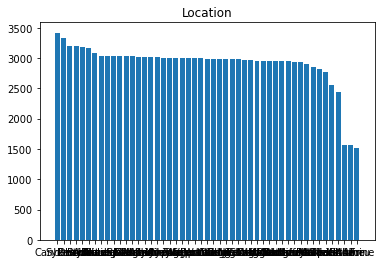

In [117]:

counts=df['Location'].value_counts()
plt.bar(counts.index,counts.values)
plt.title('Location')
plt.show()


It seems that the majority of the cities have the same amount of data collected.

In [85]:
df[num_var].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


Let's see the proportion of NAN for each feature.

In [86]:
(df.isna().sum()/df.shape[0])*100

Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64

For the majority of the features, the NAN represents less than 10%. But there is an exception for 4 features :
- Evaporation
- Sunshine
- Cloud9am  
- Cloud3pm


We can the repartition of NAN for each city. So, for each city, I represent the percentage of NAN for each covariable.

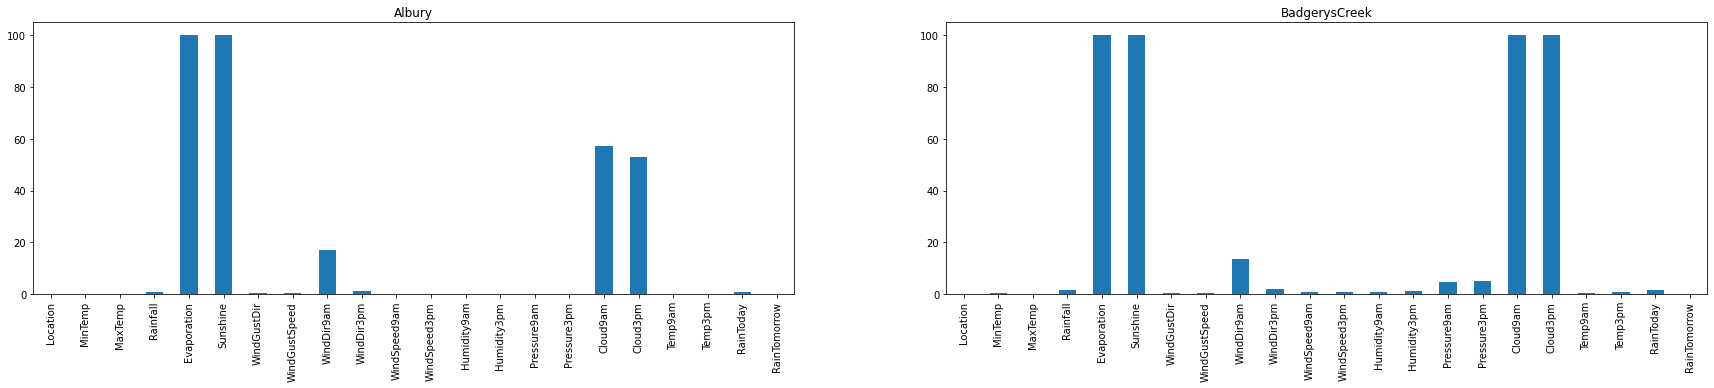

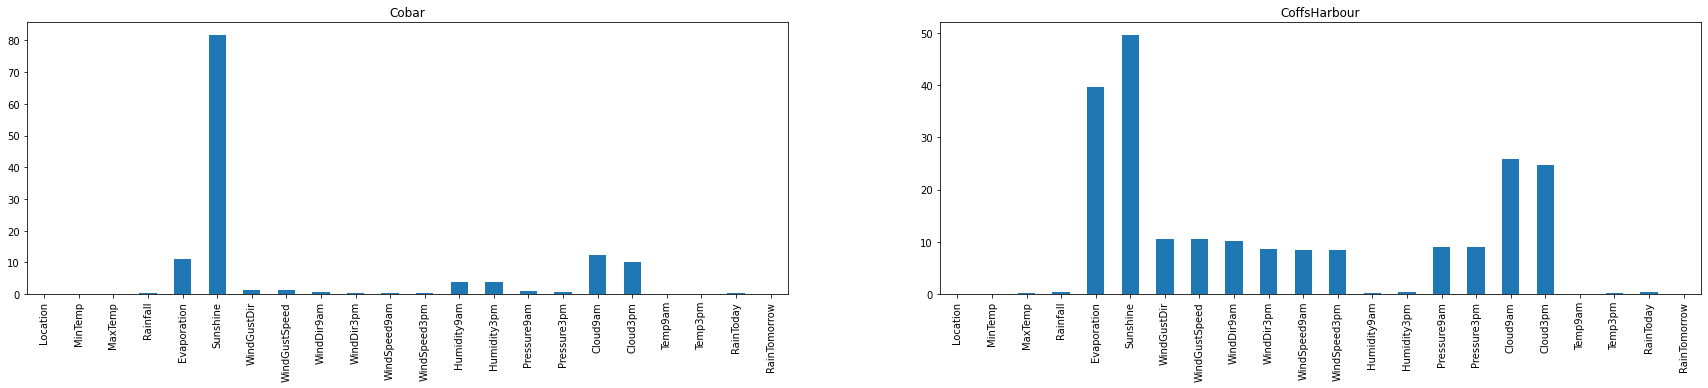

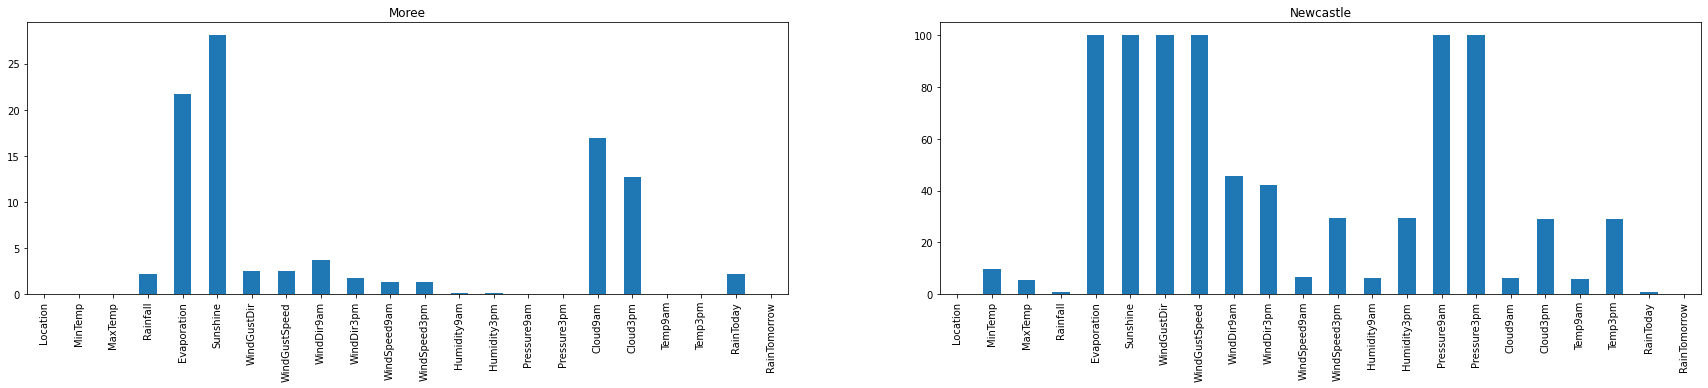

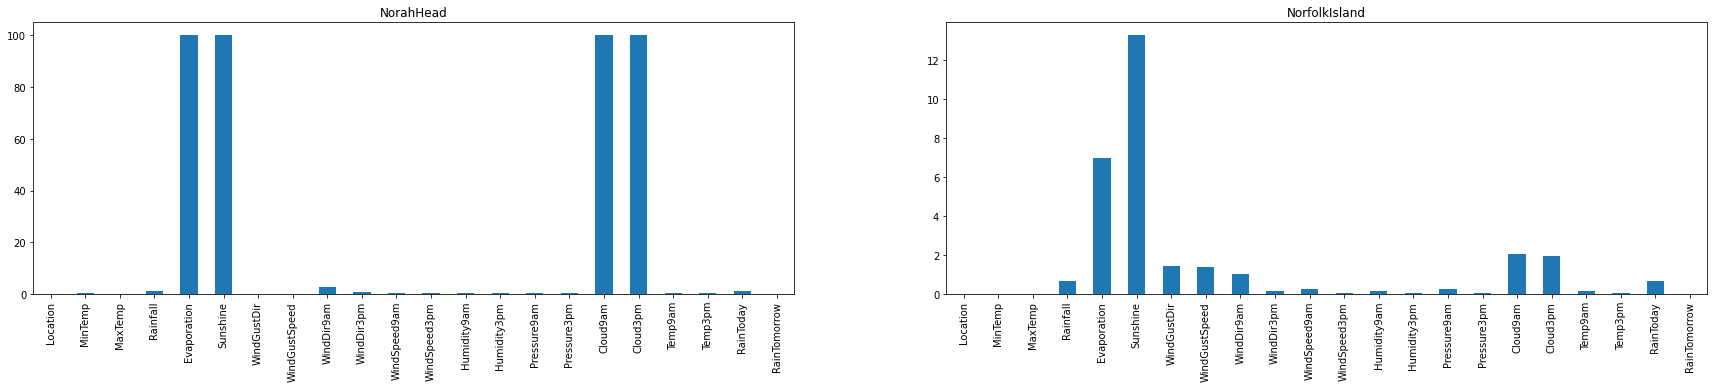

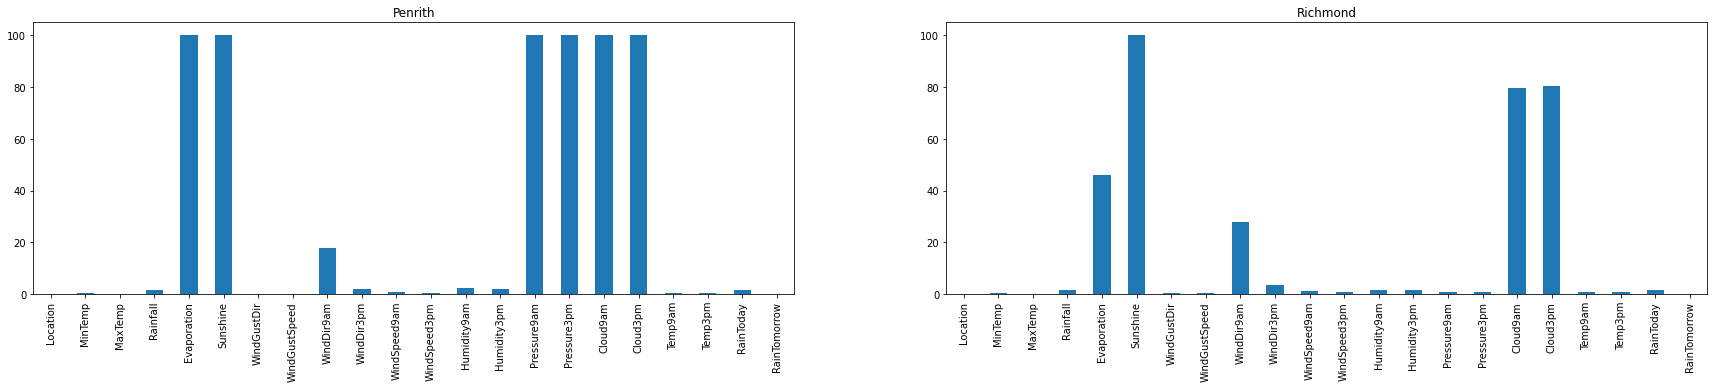

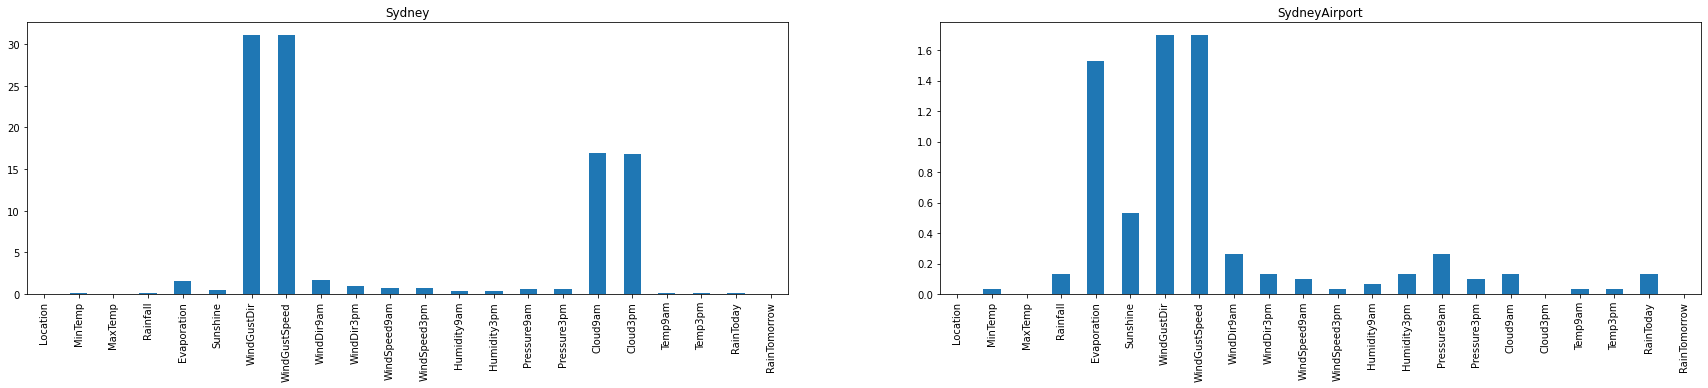

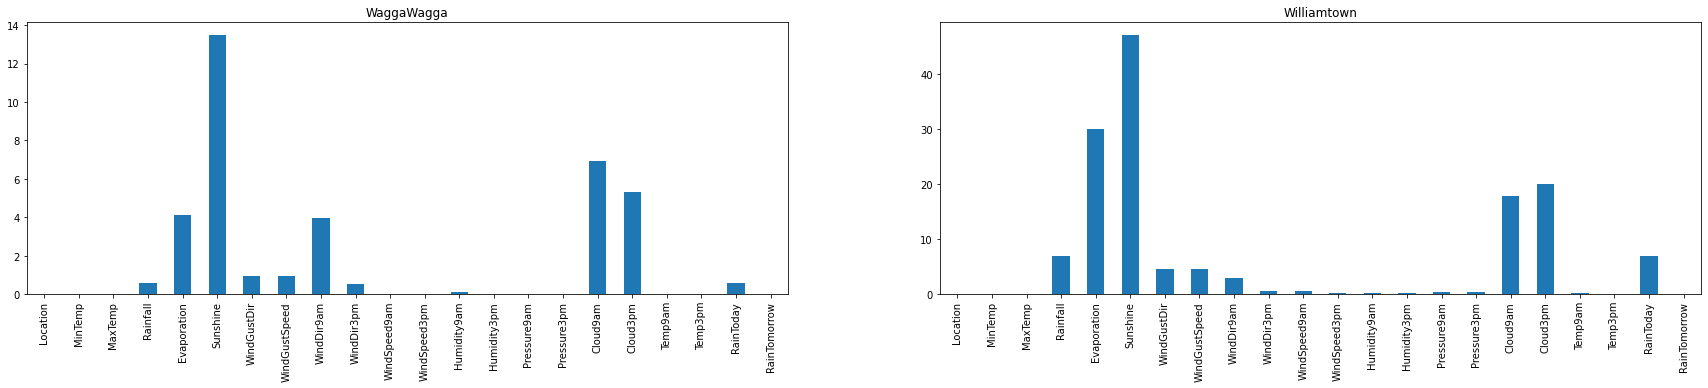

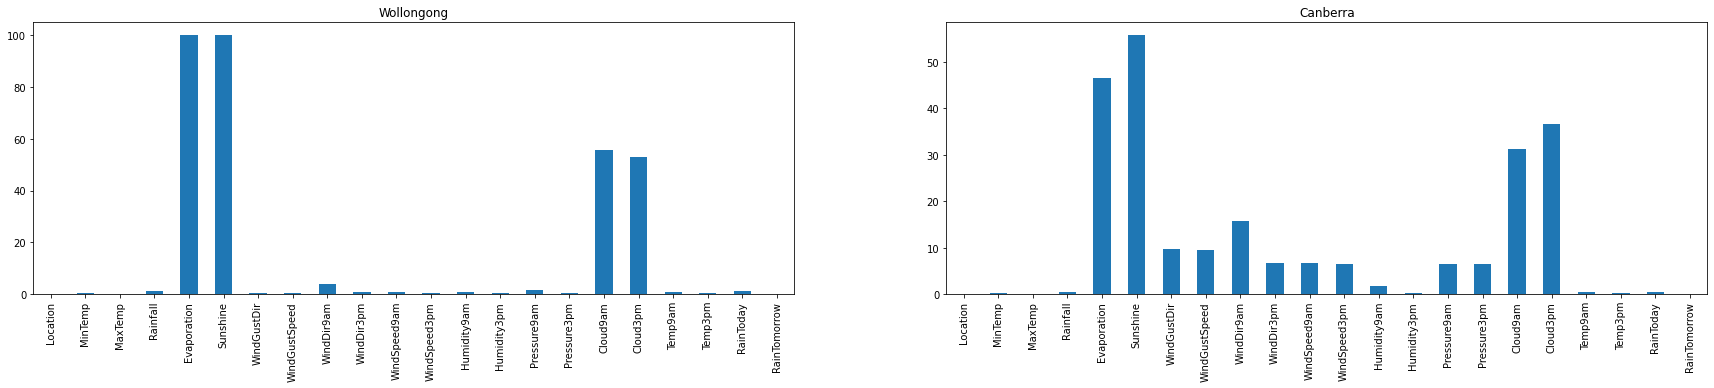

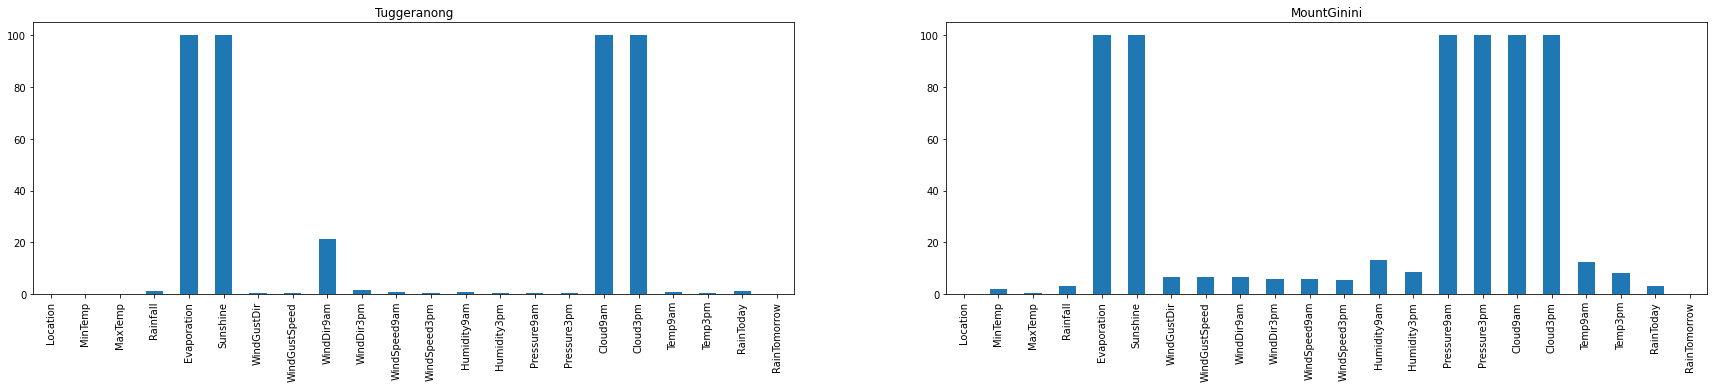

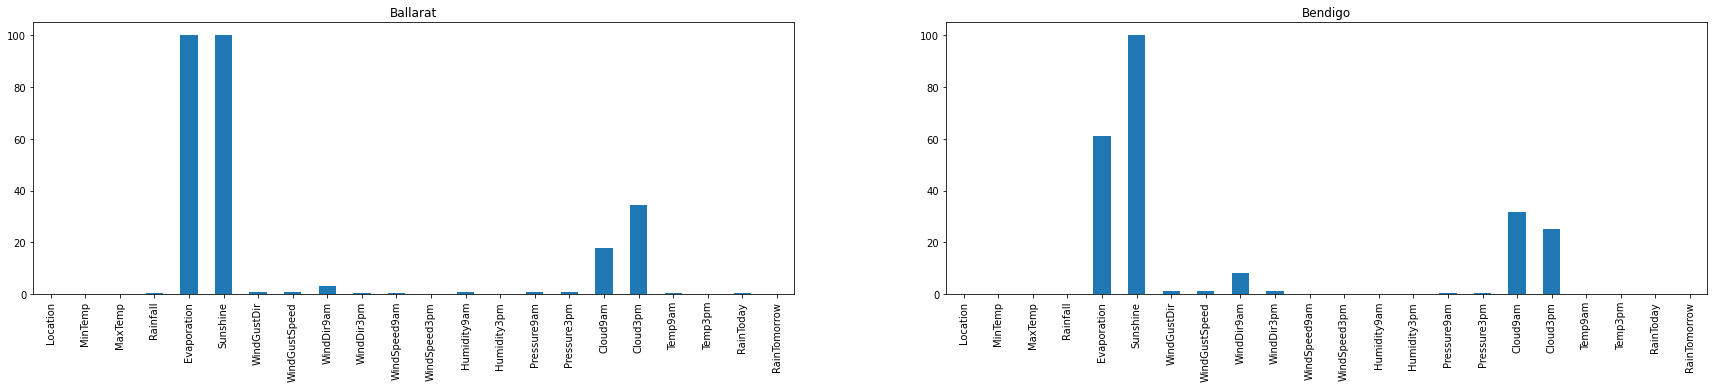

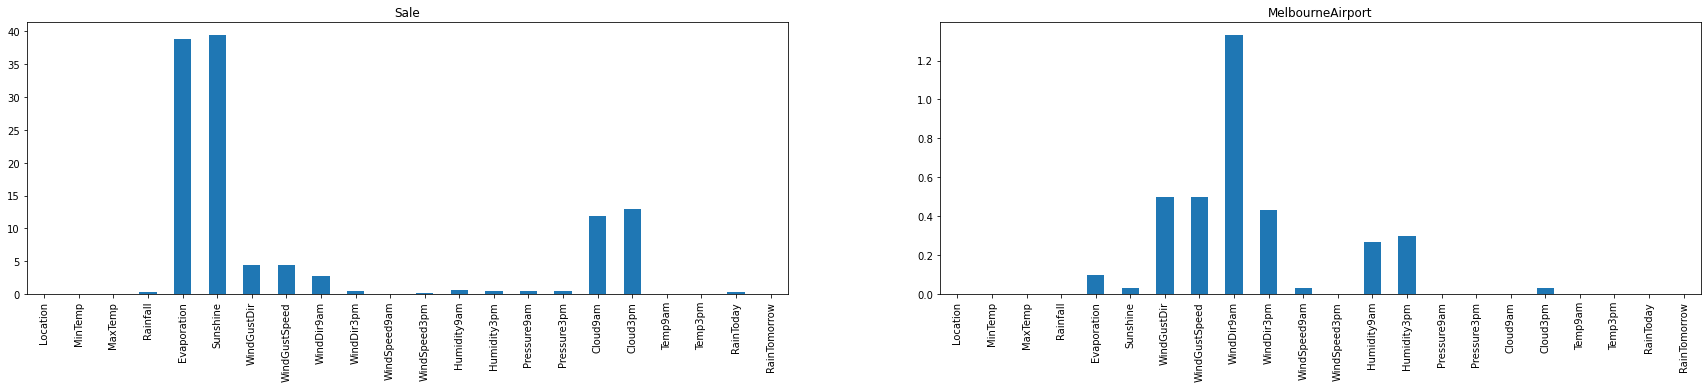

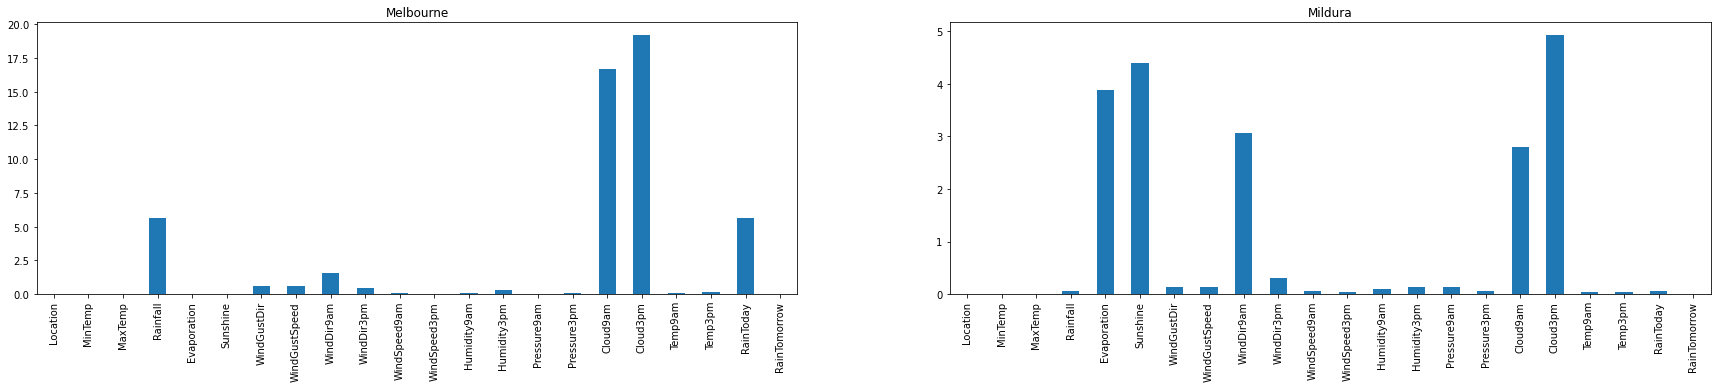

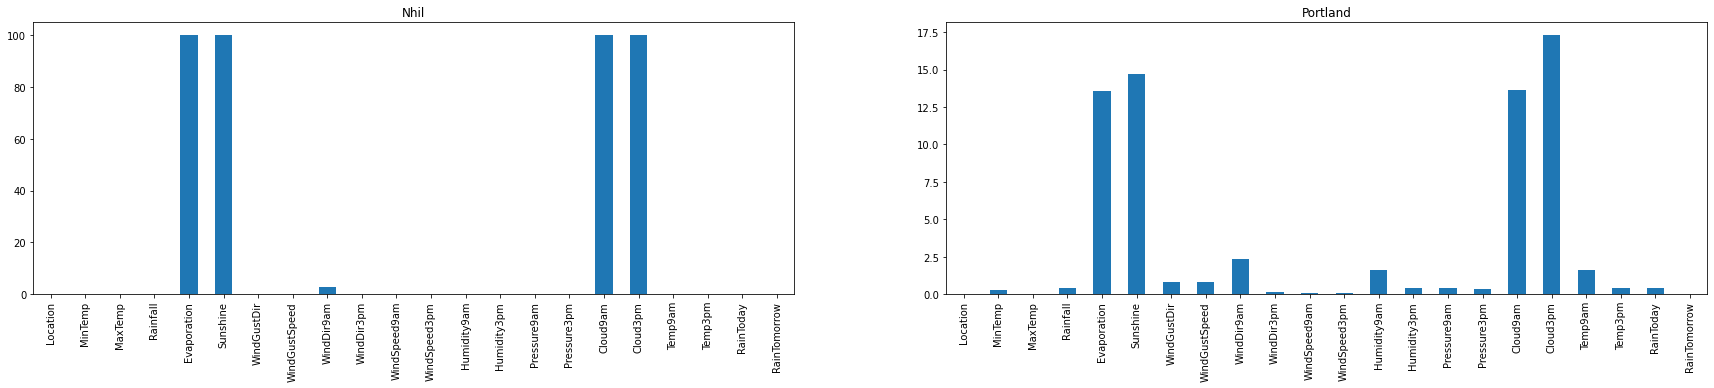

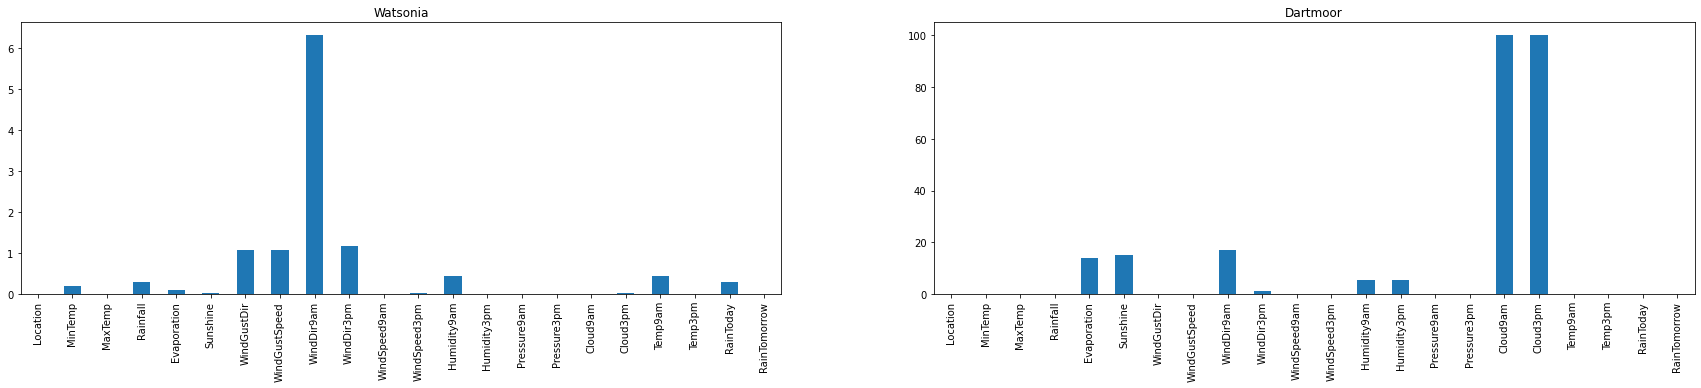

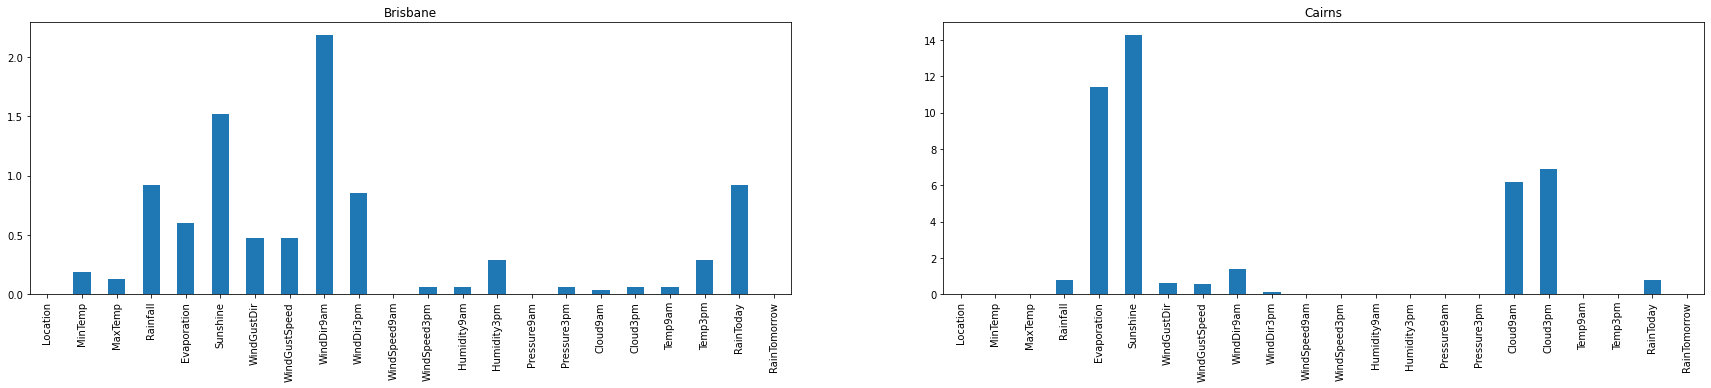

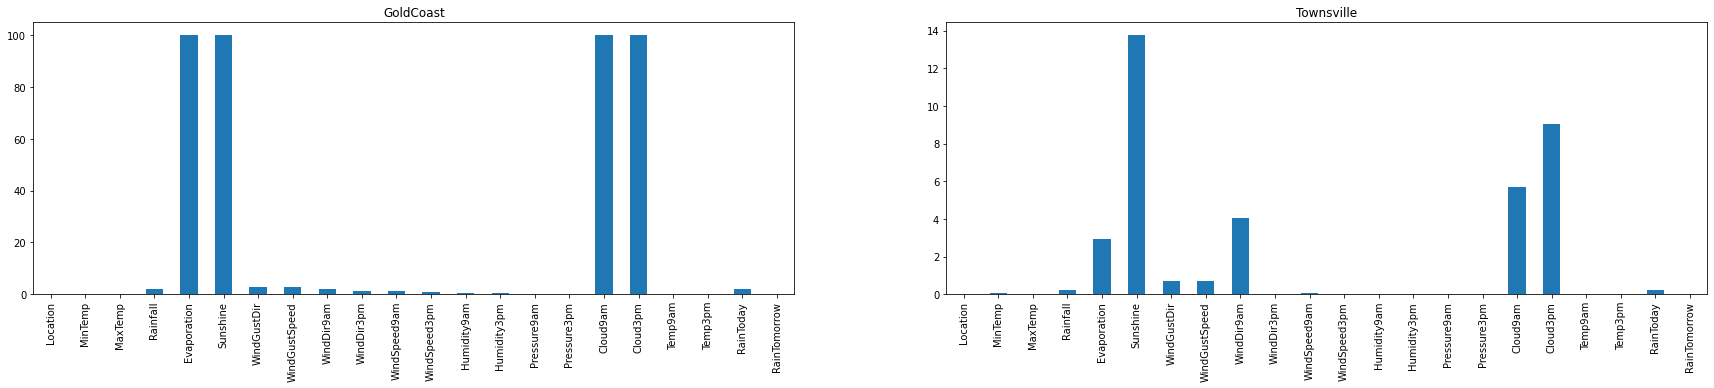

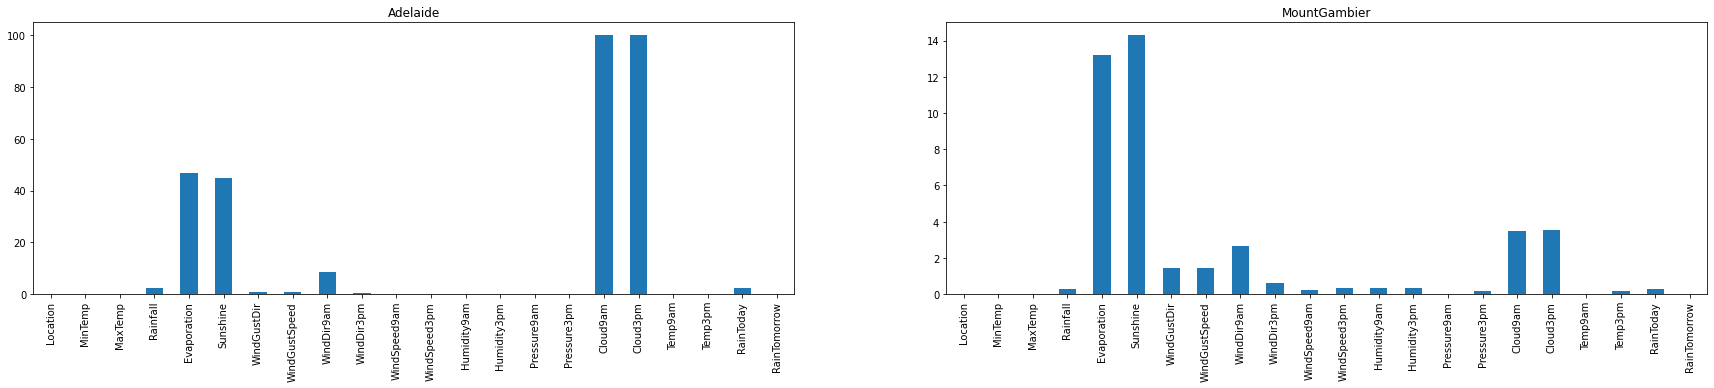

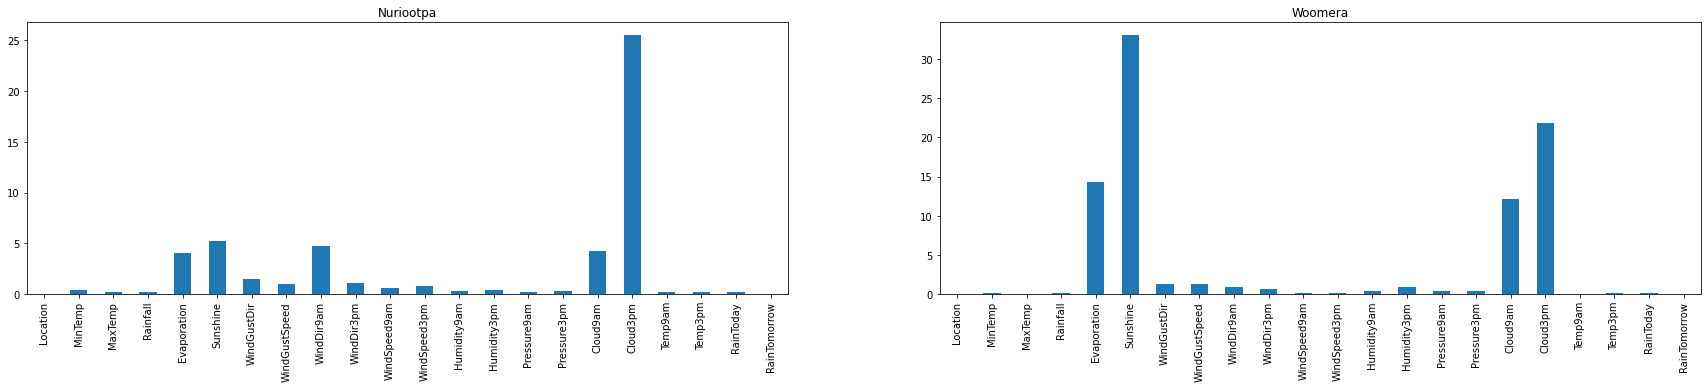

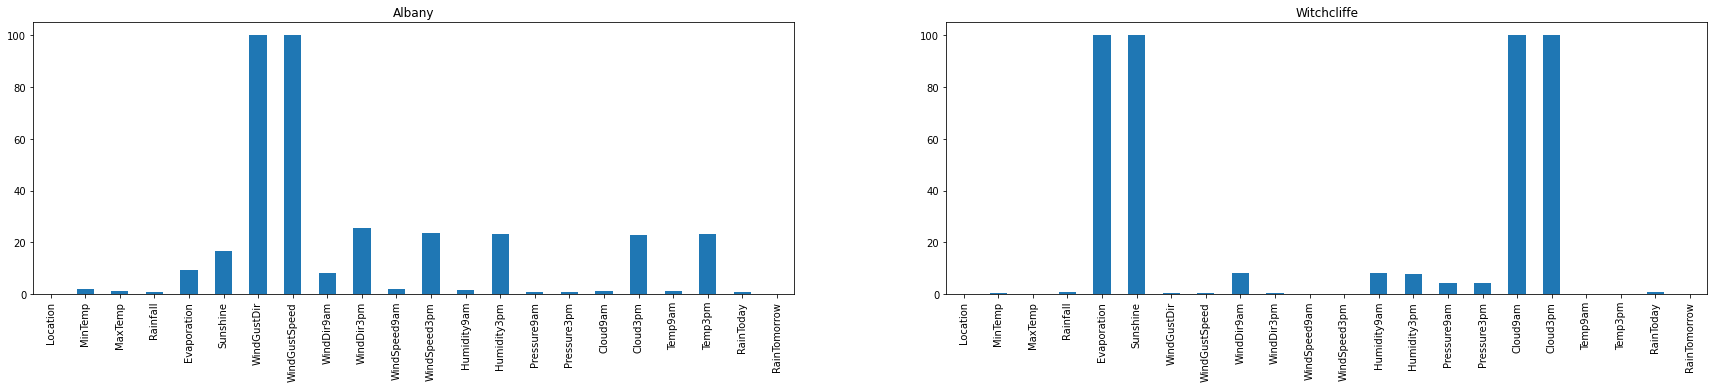

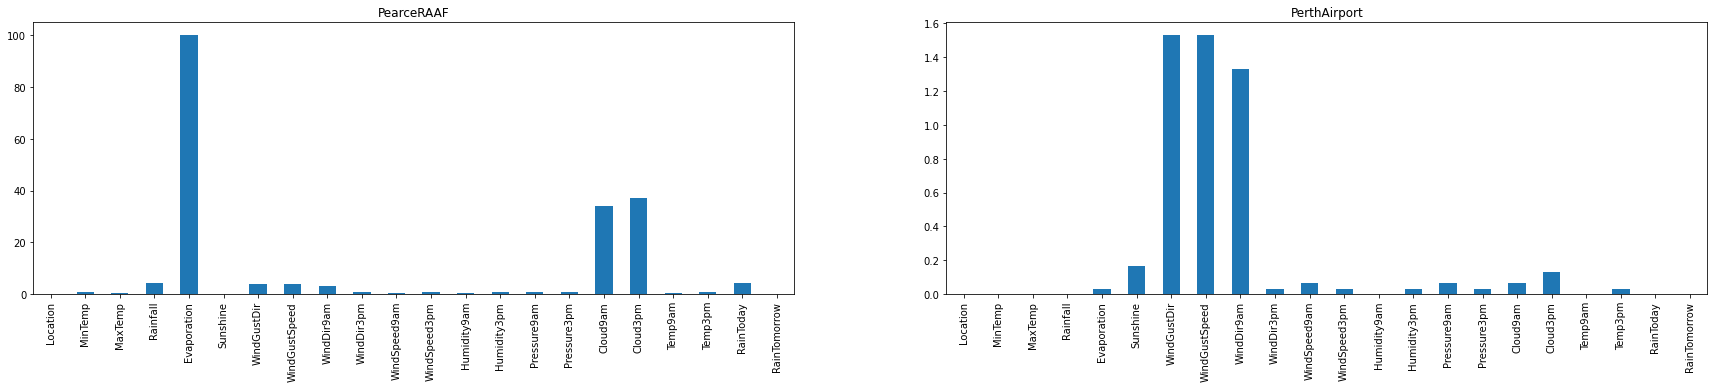

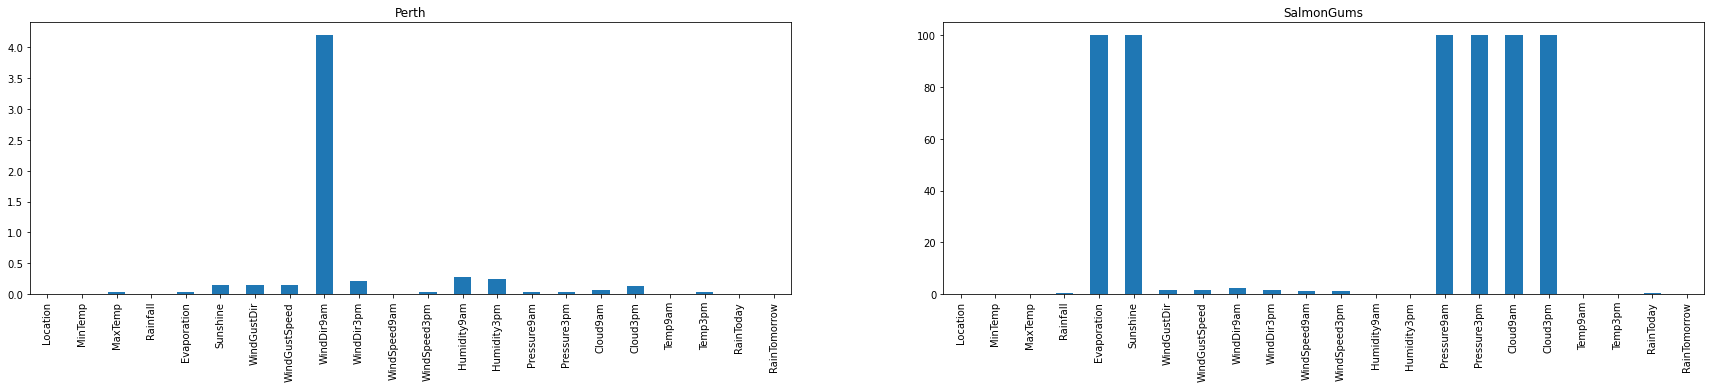

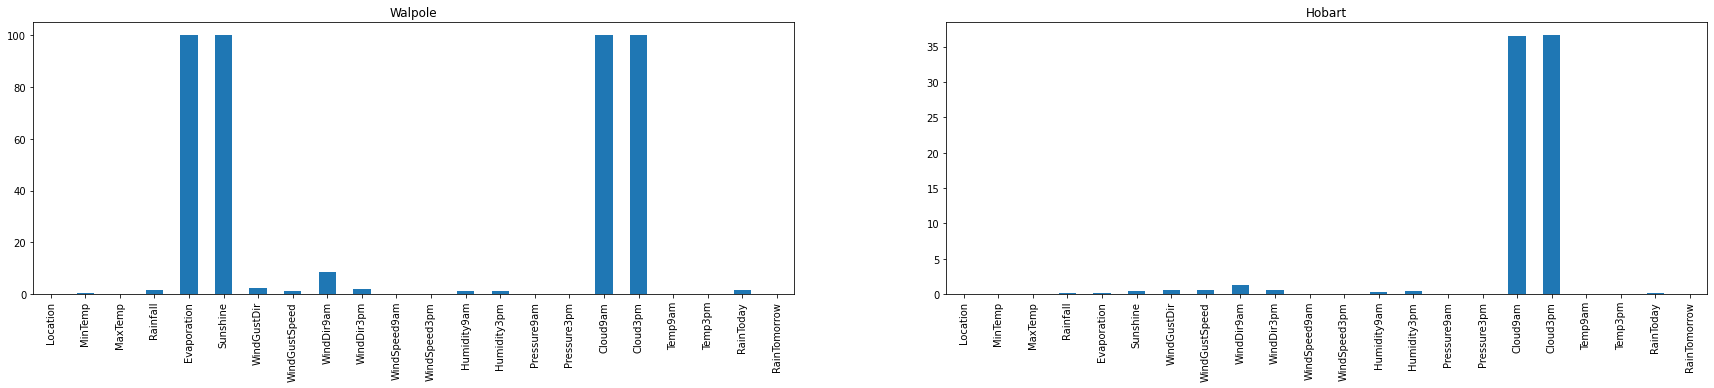

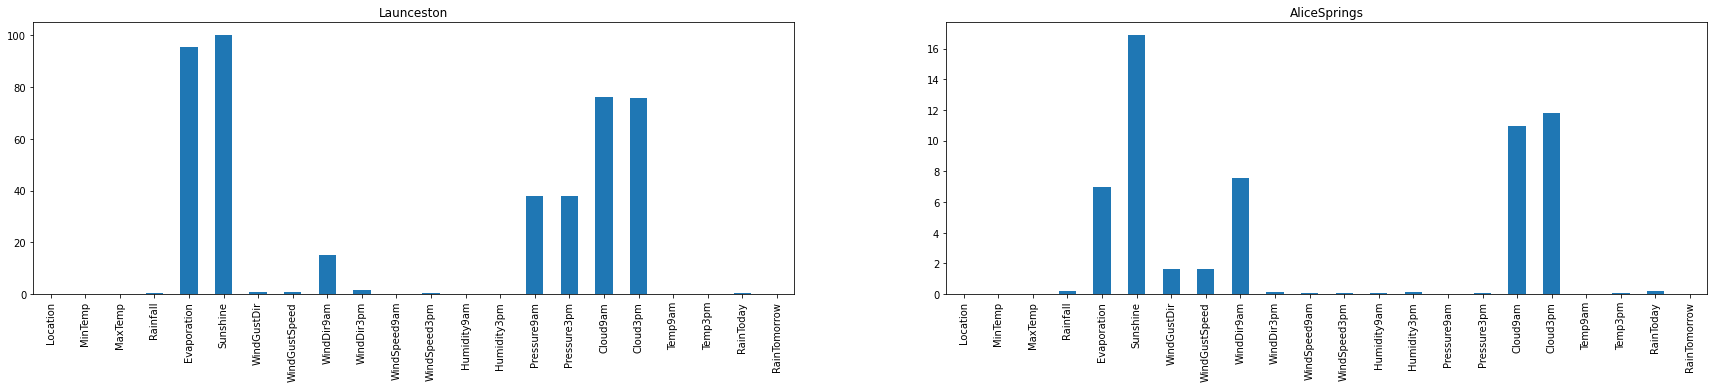

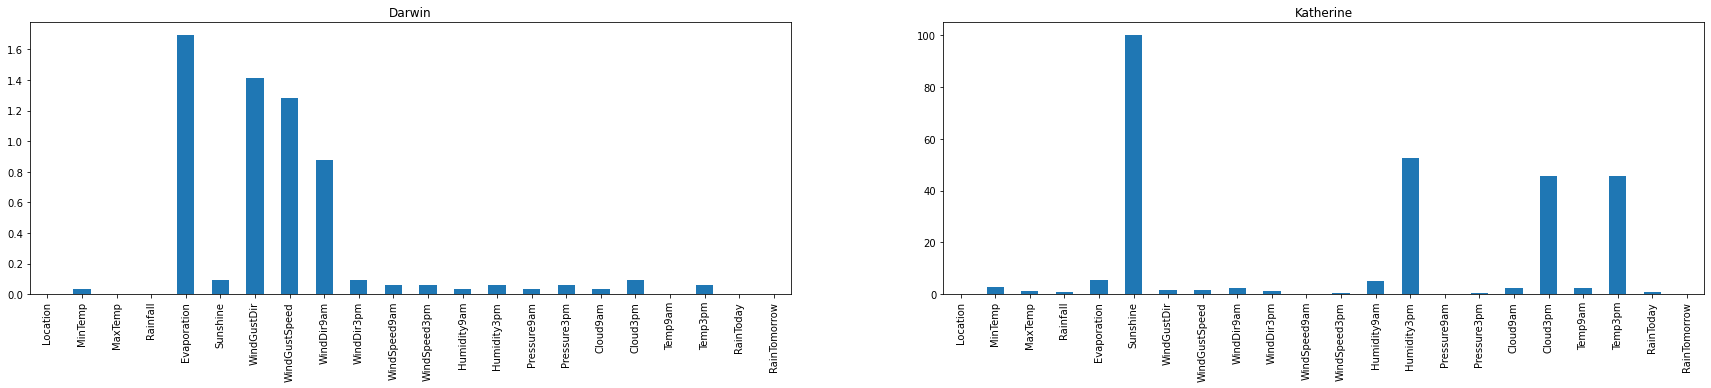

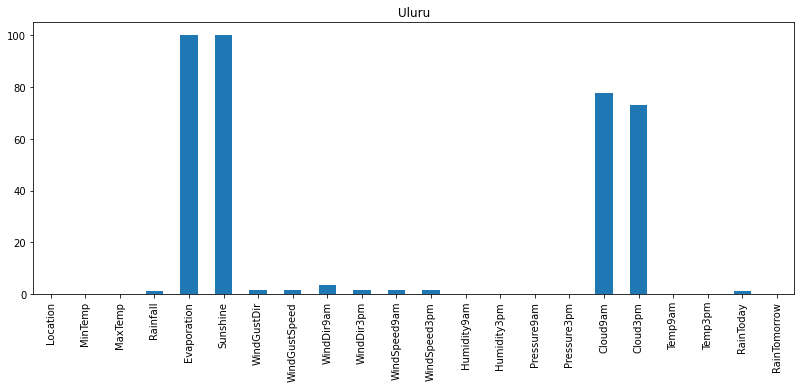

In [87]:
cities = list(df['Location'].unique())
plt.figure(figsize=(30,5))
i=1
for city in cities :
    
    df_city = df.loc[df['Location'] == city]
    plt.subplot(1,2,i)
    ((df_city.isna().sum()/df_city.shape[0])*100).plot.bar()
    plt.title(city)
    i+= 1
    if i == 3 :
        plt.show()
        plt.figure(figsize=(30,5))
        i = 1

    

What is remarkable, is that for some cities (like Albury or BadgerysCreek), all the values of those 4 columns are NAN, which means that there is no information for those features for those cities.
The solution to overcome this problem is to remove those 4 features from the dataset. 

In [88]:
df = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)
df.shape

(142193, 18)

In [89]:
cat_var=[name for name in list(df.columns) 
         if df[name].dtype=='object'and name !='RainToday'and name!='RainTomorrow']



num_var=[name for name in list(df.columns) 
          if df[name].dtype=='float64'and name !='RainToday'and name!='RainTomorrow']

An other interesting representation can be the correlation matrix to see the correlation between all the variables and more precisely the correlation between all the features and the target variable

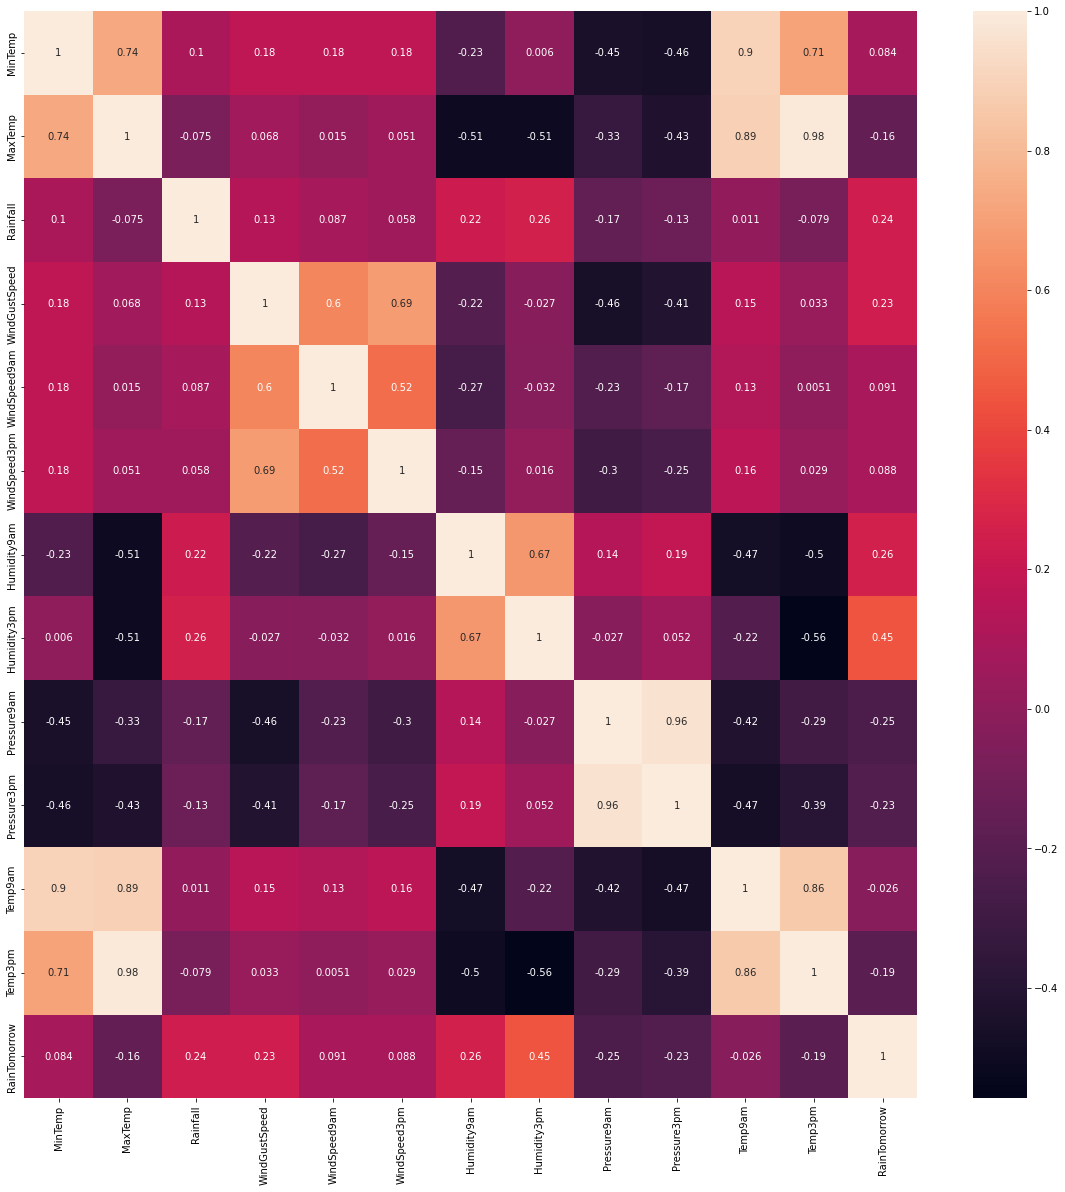

In [90]:
corr_df = df[num_var+['RainTomorrow']].corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df, annot=True)
plt.show()

We can make several remarks : 
- variables taken from different moments of the day are correlated. For example Temp9am and Temp3pm
- Pressure, Humidity are negatively correlated with Temperature which seems reasonable
- Humidity variables are the most correlated to the target variable. For instance, in a scientific point of view, humidy and the rain can have a link

Now, we have to fill the NAN for the remaining columns. The strategy is different depending on the type of data :
- for qualitatives variables : we fill the NAN by the most represented class
- for quantitatives variables : we fill the NAN either with the average or with the median

The strategy for the quantitatives variables is the following :
- if the range of the column is important (it means if most of the values are small and there are few high values), the mean can not be  representative of the feature. This is the reason why in this case, the median can represent the variable.
- if the range of the colum is small, the mean can represent the values of the features

Before doing that, we must split the dataset in 2 sets : the train and test set.
We drop the covariable "location" because it has not an effect in the prediction of the rain. Instead, it is not the name of the city but the weather conditions of the city that matter

In [91]:
Y = df["RainTomorrow"]
X = df.drop(["RainTomorrow","Location"], axis=1)
assert X.shape[0] == Y.shape[0]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

<AxesSubplot:>

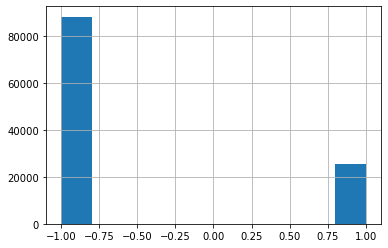

In [93]:
y_train.hist()

So, we have a problem of classification with unbalanced classes. We have to take it into account during the evaluation of the model. There are several solutions to overcome this problem, but I choose to use the balanced accuracy as a metric instead of using a classical accuracy. Anf, for all others metrics such as Area Under The Curve (AUC), Precision or Recall, I precise in the parameter that the problem is unbalanced.

This unbalanced problem is coherent because of the climate of Australia. It’s a pretty sunny country and it doesn’t rain all the time. This the reason why the class 1 (yes, it will rain tomorrow) is representing about 30% of the train dataset)

In [94]:
len(y_train)

113754

Now, we can manage the problem of NANs in the training dataset.

In [95]:
X.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
count,141556.000000,141871.000000,140787.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000,140787.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235,-0.553155
std,6.403283,7.117618,8.465173,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594,0.833081
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,-1.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000,-1.000000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,-1.000000
75%,16.800000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000,-1.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000


In [96]:
del cat_var[0]
cat_var

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [97]:
#covariables where we can replace NANs by the mean
mean_num_var = ['MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

#covariables where we can replace NANs by the median
median_num_var = ['Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'WindGustSpeed']

Here, I construct the Column Transformers and a general pipeline to simplify the operations of preprocessing of the data and the fit on the model :

In [98]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent', fill_value=np.nan)),
    ("ordinal_encoder", OrdinalEncoder())
])

categorical_preprocessing = ColumnTransformer([
    ("categorical_preproc", cat_pipeline, cat_var)
])

num_pipeline_mean = Pipeline([
    ("imputer_mean", SimpleImputer(strategy='mean', fill_value=np.nan)),
    ('standard', StandardScaler())
    
])

num_pipeline_median = Pipeline([
    ("imputer_mean", SimpleImputer(strategy='median', fill_value=np.nan)),
    ('standard', StandardScaler())
    
])

"""
numerical_preprocessing = ColumnTransformer([
    ("imputer_mean", SimpleImputer(strategy='mean', fill_value=np.nan), mean_num_var),
    ("imputer_median", SimpleImputer(strategy='median', fill_value=np.nan), median_num_var),
    ("num_preproc", num_pipeline, mean_num_var+median_num_var)
    
])"""

preprocessing = ColumnTransformer([
    ("num_mean_preproc", num_pipeline_mean, mean_num_var),
    ("num_median_preproc", num_pipeline_median, median_num_var),
    
    ("categorical_preproc", cat_pipeline, cat_var)
     
])

Finnaly the preprocessing of the data is the folowwing :
- qualitative variables : fill NAN by the most represented class + Ordinal Encoder (each class is associate to an integer)
- quantitavies variables : fill NAN by mean or median + Standardization

For qualitatives features, we have to standardize the data because it  greatly facilitates gradient descent and it allows to put all those variables on the same scale.

# Comment on the metrics used

The first metric is the balanced Accuracy (ACC) , it gives the proportion of good classification on the test dataset. More ACC is close to 1 , and more the model predicts well the class.
<br/><br/>
The other metric is the Area Under the Receiver Operating Curve (AUC), it measures the capacity of a model to separe well the classes. We plot the True Positive Rate depending on the False Positive rate with different threshold. The threshold allows to assign a class to a sample (by default it's 0.5 , if the propability to belong to class 1 is higher than 0.5 than this element is classified in class 1). Then, we measure the area under this curve. More the AUC is close to 1 and more the model has a very good capacity to separe the class and thus to have a model that predicts wery well.
<br/><br/>

<br/>
The precision for a class i  measures the rate of good classification in the class i among all the examples that have been classified in the class i
<br/>

The recall for a class i  measures the rate of good classification for elements that really belong to class i


An important thing is that all those metrics are computed on the test dataset and the best parameters are estimated in a validation set (part of the training set) through GridSearch CV !

## Fit with some models

In [99]:

model = Pipeline([
    ("preprocessor", preprocessing),
    ("classifier", RandomForestClassifier(n_estimators=100))
])
from sklearn import set_config


set_config(display="diagram")
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_mean_preproc',
                                                  Pipeline(steps=[('imputer_mean',
                                                                   SimpleImputer(fill_value=nan)),
                                                                  ('standard',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('num_median_preproc',
                                                  Pipeline(steps=[('imputer_mean',
                                                                   SimpleImputer(fill_value=nan,
                                                                                 strategy='median')),
                                                                  ('standard',
                                                                   StandardScaler())]),
                                                  ['Rainfall', 'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'WindGustSpeed']),
                                                 ('categorical_preproc',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=nan,
                                                                                 strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['WindGustDir', 'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', RandomForestClassifier())])

IMPORTANT : In order to optimize the hyperparameter, we use GridSearchCV. If we do it rigorously, we should do SearchCV for a range of the numerical parameters. But, here, I only take some values otherwise, my computer took a long time to give the best parameters for a model.

Here is a class that automatizes  the process of finding the best hyperparameters for the model and give predictions with some metrics.

In [101]:
class Model:
    def __init__(self, classifier, param_classifier, preprocessing):
        self.classifier_ = classifier #the classifier used
        self.param_classifier_ = param_classifier #the parameters for GridSearchCV
        self.preprocessing_ = preprocessing #the preprocessing of the variables for the Pipeline

    #define the model with the pipeline
    def define_model(self):
        
        model = Pipeline([
        ("preprocessor", self.preprocessing_),
        ("classifier", self.classifier_)
        ])
        self.model_ = model
        return self
    
    #fit the classifiers by finding the best hyperparameters thanks to GridSearchCV based on the balanced accuracy
    def fit(self, X_train, y_train):
        grid = GridSearchCV(self.model_, self.param_classifier_, cv=5, scoring = "balanced_accuracy")
        grid.fit(X_train, y_train)
        self.best_predictor_ = grid.best_estimator_
        self.best_params_ = grid.best_params_
        
        return self
    
    #give the prediction by the model with the best hyperparameters
    def predict(self, X_test, y_test):
        self.predictions_ = self.best_predictor_.predict(X_test)
        self.score_ = self.best_predictor_.score(X_test, y_test )
        self.predict_proba_ = self.best_predictor_.predict_proba(X_test)
        return self.predictions_
    
    #give the best hyperparameters that gives the highest value of balanced accuracy
    def best_param(self):
        return self.best_params_
    
    #give the balanced accuracy of the classifier
    def best_score(self):
        return self.score_
    
    #print the confusion matrix
    def display_confusion_matrix(self, y_test):
        cm = confusion_matrix(y_test, self.predictions_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=[-1,1])
        disp.plot()
    
    #give some metrics to analyse the performance of the model
    #(Balanced Accuracy, Area Under the Curve, Recall and Precision)
    def metrics(self, y_test):
        metric = {}
        metric['Accuracy'] = [self.score_]
        metric['AUC'] = [roc_auc_score(y_test, self.predict_proba_[:, 1] , average = 'weighted')]
        precision, recall, _, _ = precision_recall_fscore_support(y_test, self.predictions_, average=None, labels=[-1,1])
        metric['Precision (class -1)'] = [precision[0]]
        metric['Precision (class 1)'] = [precision[1]]
        metric['Recall (class -1)'] = [recall[0]]
        metric['Recall (class 1)'] = [recall[1]]
        display(pd.DataFrame.from_dict(metric))
        
    

# Logistic Regression

,Accuracy,AUC,Precision (class -1),Precision (class 1),Recall (class -1),Recall (class 1)
0,0.835121,0.845482,0.858608,0.698272,0.943117,0.45876


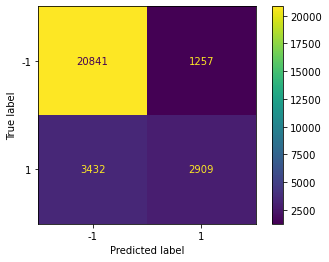

In [102]:
param_grid_lr = {'classifier__C': [1.0,0.5]}
lr = Model(LogisticRegression(random_state=0, solver='newton-cg'), param_grid_lr, preprocessing )
lr.define_model()
lr.fit(X_train, y_train)
lr.predict(X_test, y_test)
lr.display_confusion_matrix(y_test)
lr.metrics(y_test)

# SVC

In [103]:
from sklearn.svm import SVC

For the calculations are very long, I don’t have a result even after 20 minutes. So I decide not to take this model into account in the study

In [104]:
"""
#param_grid_svc = {"classifier__C": np.linspace(0.1,10,10) , "classifier__kernel" : ["poly",'rbf'], "classifier__degree": [1,2,3,4]}
param_grid_svc = {}
svc = Model(SVC(random_state=0), param_grid_svc, preprocessing )
svc.define_model()
svc.fit(X_train, y_train)
svc.predict(X_test, y_test)
svc.display_confusion_matrix(y_test)
svc.metrics(y_test) """

'\n#param_grid_svc = {"classifier__C": np.linspace(0.1,10,10) , "classifier__kernel" : ["poly",\'rbf\'], "classifier__degree": [1,2,3,4]}\nparam_grid_svc = {}\nsvc = Model(SVC(random_state=0), param_grid_svc, preprocessing )\nsvc.define_model()\nsvc.fit(X_train, y_train)\nsvc.predict(X_test, y_test)\nsvc.display_confusion_matrix(y_test)\nsvc.metrics(y_test) '

# Random Forest Classifier

In [105]:
#param_grid_rfc = {"classifier__n_estimators" : [50,75,100,125,150,200], "classifier__max_depth" : [5,10,30,50,75,100]}
param_grid_rfc = {"classifier__n_estimators" : [50,100,200], "classifier__max_depth" : [5,50,100]}

,Accuracy,AUC,Precision (class -1),Precision (class 1),Recall (class -1),Recall (class 1)
0,0.850839,0.871321,0.868956,0.747465,0.951534,0.499921


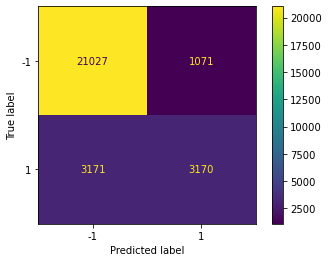

In [106]:
rfc = Model(RandomForestClassifier(random_state=0), param_grid_rfc, preprocessing )
rfc.define_model()
rfc.fit(X_train, y_train)
rfc.predict(X_test, y_test)
rfc.display_confusion_matrix(y_test)
rfc.metrics(y_test)

In [107]:
rfc.best_param()

{'classifier__max_depth': 50, 'classifier__n_estimators': 200}

# Naive Bayes Classifier

,Accuracy,AUC,Precision (class -1),Precision (class 1),Recall (class -1),Recall (class 1)
0,0.815219,0.813208,0.855893,0.613693,0.916508,0.46223


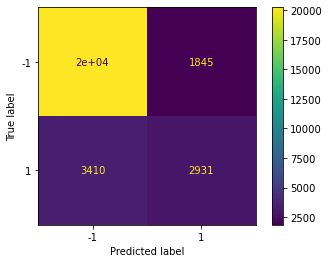

In [109]:
param_grid_gnb = {}
gnb = Model(GaussianNB(), param_grid_gnb, preprocessing )
gnb.define_model()
gnb.fit(X_train, y_train)
gnb.predict(X_test, y_test)
gnb.display_confusion_matrix(y_test)
gnb.metrics(y_test)

# Linear Discriminant Analysis (LDA)

,Accuracy,AUC,Precision (class -1),Precision (class 1),Recall (class -1),Recall (class 1)
0,0.833855,0.845405,0.858991,0.690476,0.940583,0.461915


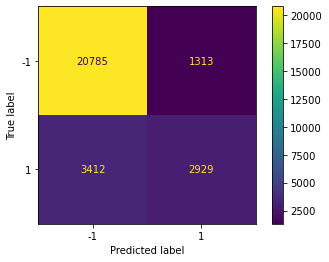

In [111]:
parameters_lda = {'shrinkage': np.linspace(0,1,5)}
lda = Model(LinearDiscriminantAnalysis(solver='eigen'), param_grid_gnb, preprocessing )
lda.define_model()
lda.fit(X_train, y_train)
lda.predict(X_test, y_test)
lda.display_confusion_matrix(y_test)
lda.metrics(y_test)

# Analyse of the predictions for the models used

Here is a recap of all the result obtained :

,AUC,ACC,Precision_-1,Precision_1,Recall_-1,Recall_1
LR,0.835,0.845,0.859,0.698,0.943,0.459
RFC,0.851,0.871,0.869,0.747,0.951,0.499
GNB,0.815,0.813,0.856,0.614,0.916,0.462
LDA,0.833,0.845,0.859,0.690,0.940,0.462


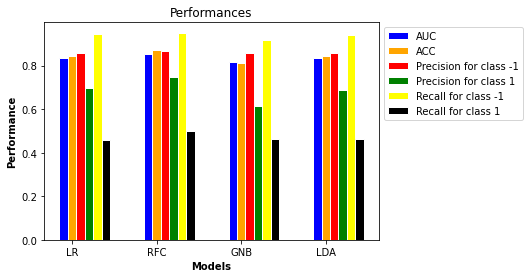

In [115]:
dic_model = {}
Models = ["LR","RFC","GNB","LDA"]
dic_model["AUC"] = [0.835,0.851,0.815,0.833]
dic_model["ACC"] = [0.845,0.871,0.813,0.845]
dic_model["Precision_-1"] = [0.859,0.869,0.856,0.859]
dic_model["Precision_1"] = [0.698,0.747,0.614,0.690]
dic_model["Recall_-1"] = [0.943,0.951,0.916,0.940]
dic_model["Recall_1"] = [0.459,0.499,0.462,0.462]
perf_model_dataframe = pd.DataFrame(dic_model,index = Models)
display(perf_model_dataframe)


# set width of bars
barWidth = 0.10
Models_bis = ["LR","RFC","GNB","LDA"]
# set heights of bars
bars1 = dic_model["AUC"]
bars2 = dic_model["ACC"]
bars3 = dic_model["Precision_-1"]
bars4 = dic_model["Precision_1"]
bars5 = dic_model["Recall_-1"]
bars6 = dic_model["Recall_1"]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='AUC')
plt.bar(r2, bars2, color='orange', width=barWidth, edgecolor='white', label='ACC')
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='Precision for class -1')
plt.bar(r4, bars4, color='green', width=barWidth, edgecolor='white', label='Precision for class 1')
plt.bar(r5, bars5, color='yellow', width=barWidth, edgecolor='white', label='Recall for class -1')
plt.bar(r6, bars6, color='black', width=barWidth, edgecolor='white', label='Recall for class 1')

 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Performance', fontweight='bold')
plt.title("Performances")
plt.xticks([r + barWidth for r in range(len(bars1))], Models_bis)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

About the confusion matrix, all the model share the same phenomenon. The class -1 is very well predicted (most of the predictions for this class are correct) but for the class 1, the predictions are bad. It is clearly a consequence of the unbalanced classes in the training set. So, it is not surprising.

Now, about the metrics. Globally, all models have metrics of the same order of magnitude. But, the Random Forest Classifier has the best performance according to the metrics. The problem of unbalanced class is noticeable again with the weak ratio for the Recall of class 1 (not even 50%) which means that more than 50% of the predictions in class 1 do not belong to this class.

# Open Note

- To solve the problem of unbalanced data, instead of using balanced accuracy and balanced weights for others metrics, we could resample the training set to have balanced classes through under-sampling and over-sampling. Or we could use the SMOTE method where extra points are generated by creatinig synthetic points for the minority class.

- For the encoding of categorials features, instead of using an Ordinal Encoder, we could use OneHot encoding